## Labelling
This notebook manages the labelling of the webcam images saved in a goole drive directory.

### Preparations

In [ ]:
# import the modules
import os
from os import listdir
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
from IPython.display import clear_output

# mount google drive
from google.colab import drive
drive.mount("/content/drive")  # mount google drive

# define paths:
master_dir = "/content/drive/MyDrive/CAS/M3_ML/Project_Moentschele/"
originals_dir = "/content/drive/MyDrive/CAS/M3_ML/Project_Moentschele/Originals/"


# initialize variables:
not_readable_images = []

Mounted at /content/drive


In [ ]:
#Function to select Möntschele images by start and end datetime. Returns True if the image is between the datetimes. Format: YYYYMMDD HHSS (e.g. 20220926 1856)
from dateutil.parser import parse

def fn_select_images(from_datetime, to_datetime, image_name):
  #parse inputs to datetime
  from_datetime = parse(from_datetime)
  to_datetime = parse(to_datetime)
  datetime_image = parse(image_name[1:9]+" "+image_name[10:14])
  #return True or False
  return from_datetime < datetime_image < to_datetime

### Import labelling.csv

Always import the labelling.csv at the beginning so that we import already labelled images.

In [ ]:
label_df_from_csv = pd.read_csv(master_dir+"labels.csv")
label_dict = {}

for ind in label_df_from_csv.index:
  wind_direction_csv = label_df_from_csv['wind_direction'][ind]
  wind_force_csv = label_df_from_csv['wind_force'][ind]
  label_list_csv = [wind_direction_csv,wind_force_csv]
  label_dict[label_df_from_csv['Unnamed: 0'][ind]] = label_list_csv

In [ ]:
# Show already labelled items:
countLabels = 0
for k, v in label_dict.items():
  if v != ['windDirectionDummy', 'WindForceDummy']:
    countLabels += 1
    #print(k, v)
print(f"Already labelled images: {countLabels}")

Already labelled images: 449


In [ ]:
# load new image names to dict and add dummy labels
label_list = ['windDirectionDummy', 'WindForceDummy']
count = 0
for images in os.listdir(originals_dir):
    if (images.endswith(".jpg")) and images not in label_dict:
      label_dict[images] = label_list
      count += 1
print(f'Added items: {count}')

Added items: 2408


###Manage not readable images (done for first load of images)

In [ ]:
#get not readable images (in case image was not fully downloaded)
for k,v in label_dict.items():
  try:
    image = io.imread(originals_dir+k)
  except:
    not_readable_images.append(k)

In [ ]:
not_readable_images

['D20221012_162056_5514.jpg',
 'D20221012_170556_8634.jpg',
 'D20221012_171056_8980.jpg',
 'D20221013_124553_0046.jpg',
 'D20221013_163553_5927.jpg',
 'D20221015_094114_5894.jpg',
 'D20221015_110114_1409.jpg',
 'D20221015_120114_5518.jpg',
 'D20221015_121114_6201.jpg',
 'D20221015_140614_4128.jpg',
 'D20221015_143114_5851.jpg',
 'D20221016_092500_5578.jpg',
 'D20221017_091204_5139.jpg',
 'D20221017_122704_8495.jpg',
 'D20221019_091227_4845.jpg',
 'D20221019_094727_7237.jpg',
 'D20221019_115727_6183.jpg',
 'D20221019_122727_8233.jpg',
 'D20221006_090628_0055.jpg',
 'D20221006_113628_0262.jpg']

In [ ]:
 # delete not readable images
print(f"Attention! This will remove the images in not_readable_images from google drive! Number of Images: {len(not_readable_images)}")
print("do you want to proceed? Enter yes..")
answer = input()
if answer == 'yes':
  for image in not_readable_images:
    try:
      os.remove(originals_dir+image)
    except:
      print("Error while deleting file : ", originals_dir+image)
  print("all files deleted!")
else:
  print("no files deleted")


Attention! This will remove the images in not_readable_images from google drive! Number of Images: 20
do you want to proceed? Enter yes..
yes
all files deleted!


### Labelling

#### Label function

Define the labelling() function. The labels are stored in a dictionary. Make sure to export to CSV from time to time (compare next step).

In [ ]:
#Topics to develop:
#implement code for inputs like (again and quit)
#Maybe think about skipping the very cloudy and rainy images (no weather for flying or hiking..).

#do the labelling for not yet labelled items
def labelling():
  maxCount = 10
  count = 0
  sleep_seconds = 2

  for k,v in label_dict.items():
    if fn_select_images(from_datetime="20221006 1240",to_datetime="20221006 2300",image_name=k) and v == ['windDirectionDummy', 'WindForceDummy']  and count < maxCount and k not in not_readable_images:
      count += 1
      print(f"Image: {k} - is loading..")
      image = io.imread(originals_dir+k)
      fig = plt.figure(1,figsize= (40,15))
      chart0 = fig.add_subplot(121)
      chart1 = fig.add_subplot(122)
        #plt.imshow(image)
      chart0.imshow(image)
      chart1.imshow(image[220:350,550:700,:]) #vor 28. September 2022
        #chart1.imshow(image[180:320,470:600,:]) #ab 28. September 2022
      plt.show()
      sleep(sleep_seconds)

      print(f'Flag showing to ? for {k}: n,l,r,u,d,0')
        #l - flag showing to the left (wind coming from the right..)
        #r - flag showing to the right
        #u - flag showing up
        #d - flag showing down
        #n - no wind (no direction)
        #0 - not defined (when it's hard to say..)
        #again - show the image again DOES NOT WORK!
      input_wind_direction = input() #To do: make sure only valid categories will be safed
      print(f'Enter wind force for {k}: (n,w,m,s,0') #To do: make sure only valid categories will be safed
      #n - no wind (flag down)
      #w - weak wind (flag up to 45 degrees)
      #m - middle wind (flag from 45 degrees to horizontal)
      #s - strong wind (flag almost horizontal or horizontal)
      #0 - not defined (when it's hard to say..)
      input_wind_force = input()
      label_dict[k] = [input_wind_direction, input_wind_force]
      print(f"Labels for {k} saved to label_dict.")
      clear_output()
  print(f"{count} labels entered - please consider saving the results to labels.csv from time to time..")

In [ ]:
labelling() #if you want to see the image again or if problems occur just stop and restart the code block.000

10 labels entered - please consider saving the results to labels.csv from time to time..


### Save results to labels.csv

In [ ]:
#Safe all labels to labels.csv:
column_names = ['wind_direction','wind_force']
label_df_from_dict = pd.DataFrame.from_dict(data=label_dict, orient='index',columns=column_names)
label_df_from_dict.to_csv(master_dir+"labels.csv")

In [ ]:
#Safe labels with old camera perspective to labels_old_camera.csv:

#Create dictionary
label_dict_old_camera = {}
for k,v in label_dict.items():
  if fn_select_images(from_datetime="20220920 0600",to_datetime="20220926 1857",image_name=k) and v != ['windDirectionDummy', 'WindForceDummy']:
    #print(k, sep = "\n")
    label_dict_old_camera[k] = v

#Save to CSV
column_names = ['wind_direction','wind_force']
label_df_from_dict_old_camera = pd.DataFrame.from_dict(data=label_dict_old_camera, orient='index',columns=column_names)
label_df_from_dict_old_camera.to_csv(master_dir+"labels_old_camera.csv")



In [ ]:
#Safe test-labels with new camera perspective to labels_test_set.csv:

#Create dictionary
label_dict_test_set = {}
for k,v in label_dict.items():
  if fn_select_images(from_datetime="20221006 1240",to_datetime="20221006 2300",image_name=k) and v != ['windDirectionDummy', 'WindForceDummy']:
    #print(k, sep = "\n")
    label_dict_test_set[k] = v

#Save to CSV
column_names = ['wind_direction','wind_force']
label_df_from_dict_test_set = pd.DataFrame.from_dict(data=label_dict_test_set, orient='index',columns=column_names)
label_df_from_dict_test_set.to_csv(master_dir+"labels_test_set.csv")

#### Label Updates, Quality Checks

Within the next code block we can alter (correct) existing labels:

In [ ]:
#get the value list for a specific key:
label_dict.get('D20221006_124557_3444.jpg')

#change the value list for a specific key:
#label_dict['D20221006_141057_9231.jpg'] = ['r','m']

#Seach for keys with specific values:
#keys = [k for k, v in label_dict.items() if v == ['0','0']]
#print(*keys, sep = "\n")

['n', 'n']

Show images for specific values:

In [ ]:
#Seach for keys with specific values:
keys = [k for k, v in label_dict.items() if v == ['l','w']]
sleep_seconds = 7

#Show the images for those keys:

for k in keys:
  image = io.imread(originals_dir+k)
  fig = plt.figure(1,figsize= (16,9))
  plt.title('Image: ' + k + '  -  Labels: Direction: ' + label_dict.get(k)[0] + ', Force: ' + label_dict.get(k)[1])
  plt.xlabel('pixels in width')
  plt.ylabel('pixels in height')
  print(k)
  plt.imshow(image)
  plt.show()
  sleep(sleep_seconds)
  clear_output()
  


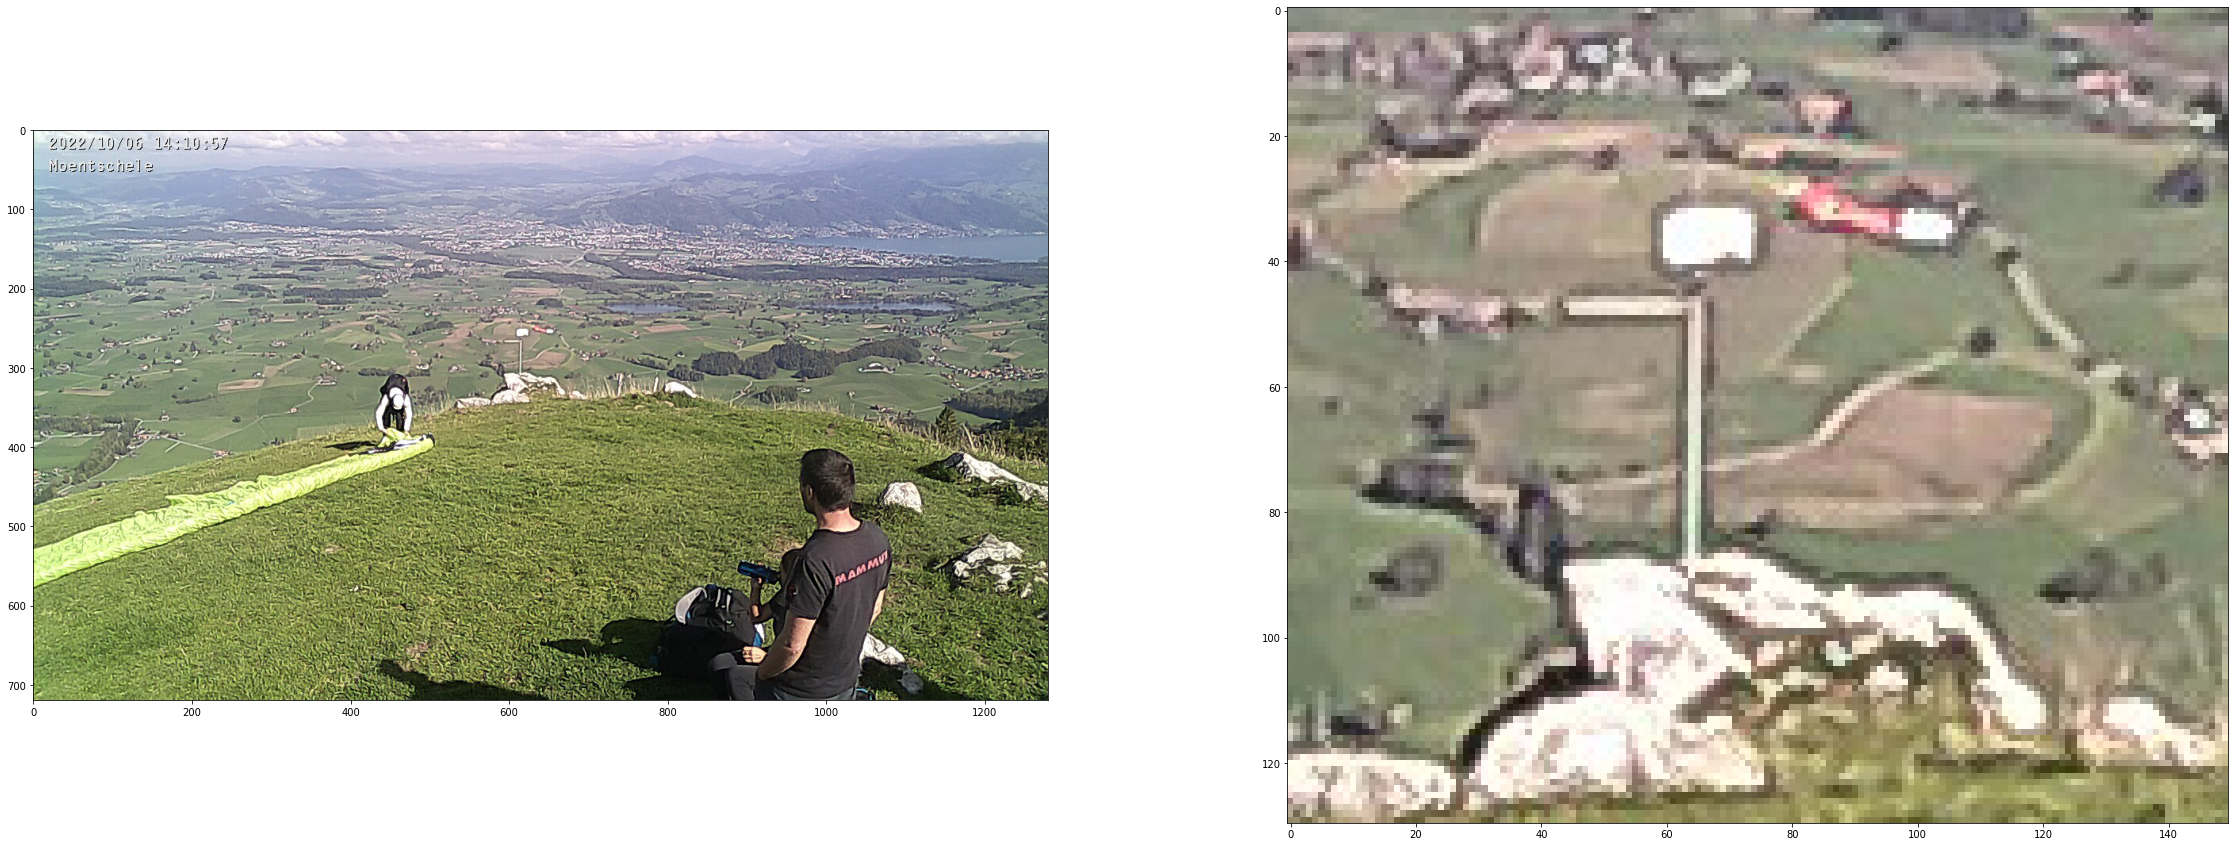

In [ ]:
#Show image for image_name
image = io.imread(originals_dir+'D20221006_141057_9231.jpg')
fig = plt.figure(1,figsize= (40,15))
chart0 = fig.add_subplot(121)
chart1 = fig.add_subplot(122)
chart0.imshow(image)
chart1.imshow(image[220:350,550:700,:]) #vor 28. September 2022
        #chart1.imshow(image[180:320,470:600,:]) #ab 28. September 2022
plt.show()